In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df=pd.read_csv("D:/WalmartSalesAnalysis-master/WalmartSalesData.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
missing_values=df.isnull().sum()
missing_values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
def find_outliers(d,col):
 q1=d[col].quantile(0.25)
 q3=d[col].quantile(0.75)
 IQR=q3-q1
 lower_limit= q1-1.5*IQR
 upper_limit= q3+1.5*IQR
 return lower_limit,upper_limit

a= ['Unit price','Quantity','Tax 5%','Total', 'cogs','gross margin percentage','gross income','Rating']
for i in a:
 print(find_outliers(df,i))




(-34.715, 145.525)
(-4.5, 15.5)
(-18.855687500000002, 47.2258125)
(-395.9694375, 991.7420625)
(-377.11375000000004, 944.5162500000001)
(4.761904762, 4.761904762)
(-18.855687500000002, 47.2258125)
(1.0, 13.0)


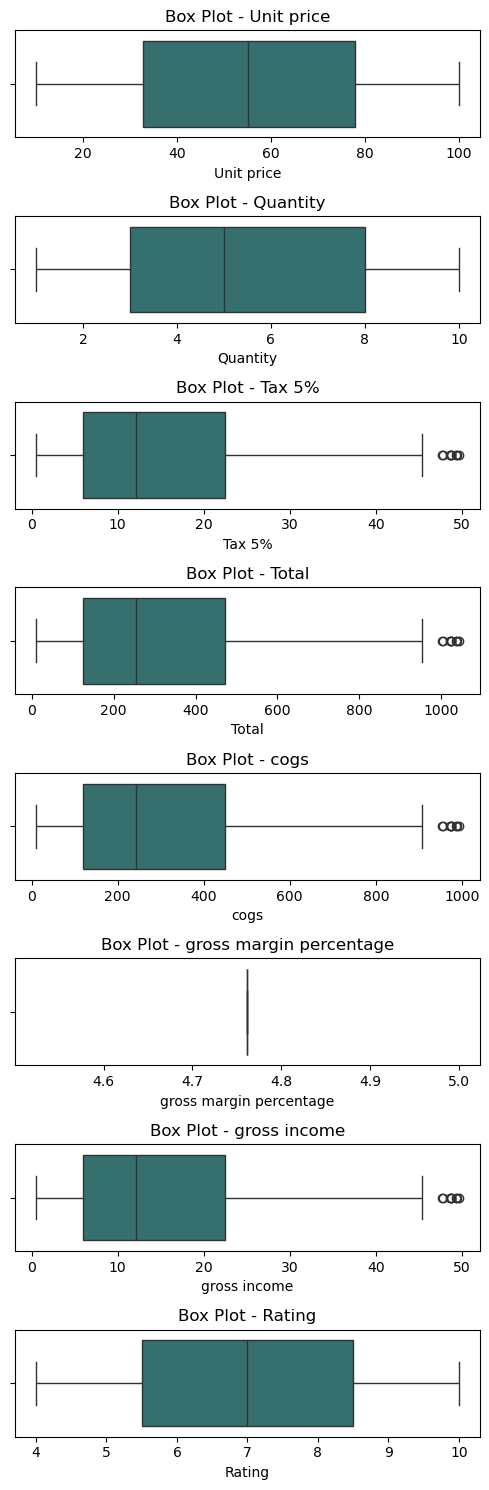

In [7]:
numerical_columns = ['Unit price','Quantity','Tax 5%','Total', 'cogs','gross margin percentage','gross income','Rating']
plt.figure(figsize=(5, 15)) 
for i, column in enumerate(numerical_columns, 1):
 plt.subplot(len(numerical_columns), 1, i) 
 sns.boxplot(df[column], orient='h',color='#2B7A78')
 plt.title(f'Box Plot - {column}')
 plt.xlabel(column)
 plt.tight_layout() 

In [8]:
df["Tax 5%"]=df["Tax 5%"].apply(lambda x: df["Tax 5%"].mean() if(x<-18.855687500000002 or x>47.2258125) else x)
df["Tax 5%"]

0      26.141500
1       3.820000
2      16.215500
3      23.288000
4      30.208500
         ...    
995     2.017500
996    15.379369
997     1.592000
998     3.291000
999    30.919000
Name: Tax 5%, Length: 1000, dtype: float64

In [9]:
df["Total"]=df["Total"].apply(lambda x: df["Total"].mean() if(x<-395.9694375 or x>991.7420625) else x)
df["Total"]

0      548.971500
1       80.220000
2      340.525500
3      489.048000
4      634.378500
          ...    
995     42.367500
996    322.966749
997     33.432000
998     69.111000
999    649.299000
Name: Total, Length: 1000, dtype: float64

In [10]:
df["cogs"]=df["cogs"].apply(lambda x: df["cogs"].mean() if(x<-377.11375000000004 or x>944.5162500000001) else x)
df["cogs"]

0      522.83000
1       76.40000
2      324.31000
3      465.76000
4      604.17000
         ...    
995     40.35000
996    307.58738
997     31.84000
998     65.82000
999    618.38000
Name: cogs, Length: 1000, dtype: float64

In [11]:
df["gross income"]=df["gross income"].apply(lambda x: df["gross income"].mean() if(x<-18.855687500000002 or x>47.2258125) else x)
df["gross income"]

0      26.141500
1       3.820000
2      16.215500
3      23.288000
4      30.208500
         ...    
995     2.017500
996    15.379369
997     1.592000
998     3.291000
999    30.919000
Name: gross income, Length: 1000, dtype: float64

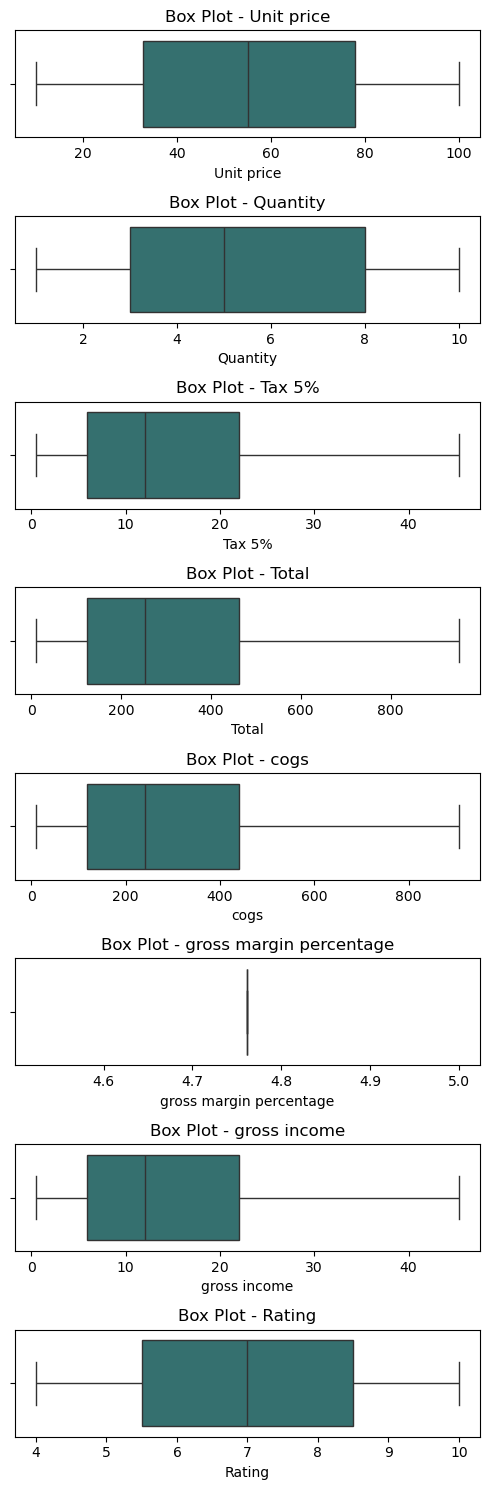

In [12]:
numerical_columns = ['Unit price','Quantity','Tax 5%','Total', 'cogs','gross margin percentage','gross income','Rating']
plt.figure(figsize=(5, 15)) 
for i, column in enumerate(numerical_columns, 1):
 plt.subplot(len(numerical_columns), 1, i) 
 sns.boxplot(df[column], orient='h',color='#2B7A78')
 plt.title(f'Box Plot - {column}')
 plt.xlabel(column)
 plt.tight_layout() 

## 1. How many unique cities does the data have?

In [13]:
city = df['City'].value_counts()
city

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

## 2. In which city is each branch?

In [14]:
branch = df['Branch'].value_counts()
df1=(city,branch)
df1

(City
 Yangon       340
 Mandalay     332
 Naypyitaw    328
 Name: count, dtype: int64,
 Branch
 A    340
 B    332
 C    328
 Name: count, dtype: int64)

## 3. How many unique product lines does the data have?

In [15]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

## 4. What is the most common payment method?

In [16]:
df['Payment'].value_counts().idxmax()

'Ewallet'

## 5.What is the most selling product line?

In [17]:
df['Product line'].value_counts().head(3)

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Name: count, dtype: int64

## 6.What is the total revenue by month?

In [84]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.groupby('Month')['Total'].sum()

Month
1    112820.396745
2     95085.629247
3    108755.983749
Name: Total, dtype: float64

## 7.What month had the largest COGS?

In [19]:
df.groupby('Month')['cogs'].sum()

Month
1    107447.99690
2     90557.74214
3    103577.12738
Name: cogs, dtype: float64

## 8.What product line has the largest revenue?

In [20]:
df.groupby('Product line')['Total'].sum()

Product line
Electronic accessories    54337.531500
Fashion accessories       52172.150247
Food and beverages        55433.350749
Health and beauty         49193.739000
Home and lifestyle        51081.564996
Sports and travel         54443.673249
Name: Total, dtype: float64

## 9.What is the city with largest revenue?

In [21]:
df.groupby('City')['Total'].sum()


City
Mandalay     104798.730498
Naypyitaw    106379.231994
Yangon       105484.047249
Name: Total, dtype: float64

## 10.What product line had the largest TAX?

In [24]:
df.groupby('Product line')['Tax 5%'].sum()

Product line
Electronic accessories    2587.501500
Fashion accessories       2484.388107
Food and beverages        2639.683369
Health and beauty         2342.559000
Home and lifestyle        2432.455476
Sports and travel         2592.555869
Name: Tax 5%, dtype: float64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

## 11.What is the most common product line by gender?

In [29]:
product_line_by_gender = df.groupby(['Gender', 'Product line']).size().reset_index(name='count')
most_common_product_by_gender = product_line_by_gender.loc[product_line_by_gender.groupby('Gender')['count'].idxmax()]
most_common_product_by_gender

,Gender,Product line,count
1,Female,Fashion accessories,96
9,Male,Health and beauty,88


## 12.What is the average rating of each product line?

In [32]:
average_rating_by_product_line = df.groupby('Product line')['Rating'].mean().reset_index()
average_rating_by_product_line

,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


## 13.Number of sales made in each time of the day per weekday?

In [33]:
sales_by_time_of_day = df.groupby(['weekday', 'time_of_day'])['sales'].sum().reset_index()

KeyError: 'weekday'

## 14.Which of the customer types brings the most revenue?

In [53]:
df.groupby('Customer type')['Total'].sum()

Customer type
Member    162094.529247
Normal    154567.480494
Name: Total, dtype: float64

## 15.Which city has the largest tax percent/ VAT (Value Added Tax)?

In [46]:
df['City'].loc[df['City'].idxmax()]

'Yangon'

## 16.Which customer type pays the most in VAT? 

## 17.How many unique customer types does the data have?

In [57]:
df['Customer type'].nunique()


2

## 18.How many unique payment methods does the data have?

In [59]:
df['Payment'].nunique()

3

## 19.What is the most common customer type?

In [64]:
df['Customer type'].value_counts().idxmax()


'Member'

## 20.Which customer type buys the most?

In [69]:
df.groupby('Customer type')['Quantity'].sum().reset_index().idxmax()

Customer type    1
Quantity         0
dtype: int64

## 21.What is the gender of most of the customers?

In [70]:
df['Gender'].value_counts().idxmax()

'Female'

## 22.What is the gender distribution per branch?

In [76]:
df.groupby('Branch')['Gender'].value_counts()

Branch  Gender
A       Male      179
        Female    161
B       Male      170
        Female    162
C       Female    178
        Male      150
Name: count, dtype: int64

## 23.Which time of the day do customers give most ratings?

In [144]:
df['timestamp'] = pd.to_datetime(df['Time'])
df['Hour_of_day'] = df['timestamp'].dt.hour
df.groupby('Hour_of_day')['Rating'].count().idxmax()


C:\Users\wwwja\AppData\Local\Temp\ipykernel_11376\1140871329.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['Time'])


19

## 24.Which time of the day do customers give most ratings per branch?

In [110]:
df['Hour_of_day'] = df['timestamp'].dt.hour
df.groupby(['Branch','Hour_of_day'])['Rating'].count().idxmax()


('B', 19)

## 25.Which day fo the week has the best avg ratings?

In [142]:
df['week']=pd.to_datetime(df['Date'])
df['Weekname'] = df['week'].dt.day_name()
df.groupby('Weekname')['Rating'].mean().idxmax()


'Monday'

## 26.Which day of the week has the best average ratings per branch?

In [143]:
df['week']=pd.to_datetime(df['Date'])
df['Weekname'] = df['week'].dt.day_name()
df.groupby(['Branch','Weekname'])['Rating'].mean().idxmax()


('B', 'Monday')